In [9]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df = pd.read_csv("https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/fa71405126017e6a37bea592440b4bee94bf7b9e/titanic.csv")

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checking for Null values in the dataset ( which may create a problem later )

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

*Age and Cabin are NOT MCAR as the accident occured and then this data was recorded. Maybe the cabin members were not alive to tell the age*

*However the Embarked category is MCAR as its not related*

In [13]:
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


**Age and Cabin are MNAR**

In [14]:
df["cabin_nan"] = np.where(df["Cabin"].isnull(),1,0)

In [15]:
df["cabin_nan"].mean()

0.7710437710437711

**77% of the data in Cabin feature is missing**

In [24]:
df_new = pd.DataFrame(df,columns=["Age"])

In [25]:
df_new.isnull().mean()

Age    0.198653
dtype: float64

In [26]:
def impute_nan(df,para,itype):
  if itype =="mean":
    x = df[para].mean()
  elif itype == "median":
    x = df[para].median()
  else:
    x =  df[para].mode()
  df[para+"_imputed"] = df[para].fillna(x)

In [27]:
impute_nan(df_new,"Age","median")

In [31]:
df_new.Age.std()

14.526497332334044

In [32]:
df_new.Age_imputed.std()

13.019696550973194

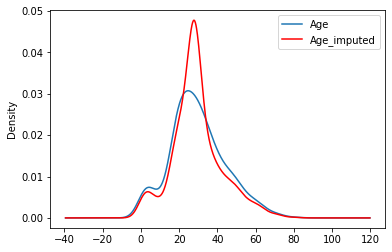

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)
df_new['Age'].plot(kind='kde', ax=ax)
df_new["Age_imputed"].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')